In [129]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

% matplotlib inline

In [130]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [131]:
df = pd.read_csv('LoanStats_2016Q1.csv', engine = 'python', skipinitialspace=True, skiprows = 1)

In [132]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,nan,34000.000,34000.000,34000.000,60 months,15.31%,814.410,C,C5,...,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan
1,NaN,nan,12200.000,12200.000,12200.000,60 months,11.47%,268.130,B,B5,...,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan
2,NaN,nan,10000.000,10000.000,10000.000,36 months,11.47%,329.620,B,B5,...,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan
3,NaN,nan,21000.000,21000.000,21000.000,36 months,11.47%,692.200,B,B5,...,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan
4,NaN,nan,35000.000,35000.000,35000.000,60 months,21.18%,950.420,E,E3,...,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan


In [133]:
df_select = df[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'home_ownership'
              , 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'purpose','zip_code'
              , 'addr_state']]

In [134]:
df_select.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,zip_code,addr_state
0,34000.000,34000.000,34000.000,60 months,15.31%,814.410,C,MORTGAGE,150000.000,Source Verified,Mar-2016,Current,n,debt_consolidation,140xx,NY
1,12200.000,12200.000,12200.000,60 months,11.47%,268.130,B,RENT,90000.000,Verified,Mar-2016,Current,n,debt_consolidation,773xx,TX
2,10000.000,10000.000,10000.000,36 months,11.47%,329.620,B,RENT,35000.000,Source Verified,Mar-2016,Current,n,other,913xx,CA
3,21000.000,21000.000,21000.000,36 months,11.47%,692.200,B,MORTGAGE,175000.000,Not Verified,Mar-2016,Current,n,home_improvement,481xx,MI
4,35000.000,35000.000,35000.000,60 months,21.18%,950.420,E,MORTGAGE,195000.000,Verified,Mar-2016,Fully Paid,n,debt_consolidation,871xx,NM


In [135]:
df_select.isnull().sum()

loan_amnt              2
funded_amnt            2
funded_amnt_inv        2
term                   2
int_rate               2
installment            2
grade                  2
home_ownership         2
annual_inc             2
verification_status    2
issue_d                2
loan_status            2
pymnt_plan             2
purpose                2
zip_code               2
addr_state             2
dtype: int64

In [136]:
df_select = df_select.dropna()

In [137]:
df_select.isnull().sum()

loan_amnt              0
funded_amnt            0
funded_amnt_inv        0
term                   0
int_rate               0
installment            0
grade                  0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
pymnt_plan             0
purpose                0
zip_code               0
addr_state             0
dtype: int64

# From Data Exploration, we have noticed that the field annual_inc has many outliers. Hence, before we proceed with ML modelling, we will remove these outliers. 

In [138]:
df_select['loan_status'].value_counts()

Current               69153
Fully Paid            44434
Charged Off           16450
Late (31-120 days)     2222
In Grace Period        1229
Late (16-30 days)       395
Default                   4
Name: loan_status, dtype: int64

In [139]:
df_select['new_loan_status'] = np.where(df_select['loan_status'] == 'Current', 'Good', 
         (np.where(df_select['loan_status'] == 'Fully Paid', 'Good','Bad')))

In [140]:
df_select

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,zip_code,addr_state,new_loan_status
0,34000.000,34000.000,34000.000,60 months,15.31%,814.410,C,MORTGAGE,150000.000,Source Verified,Mar-2016,Current,n,debt_consolidation,140xx,NY,Good
1,12200.000,12200.000,12200.000,60 months,11.47%,268.130,B,RENT,90000.000,Verified,Mar-2016,Current,n,debt_consolidation,773xx,TX,Good
2,10000.000,10000.000,10000.000,36 months,11.47%,329.620,B,RENT,35000.000,Source Verified,Mar-2016,Current,n,other,913xx,CA,Good
3,21000.000,21000.000,21000.000,36 months,11.47%,692.200,B,MORTGAGE,175000.000,Not Verified,Mar-2016,Current,n,home_improvement,481xx,MI,Good
4,35000.000,35000.000,35000.000,60 months,21.18%,950.420,E,MORTGAGE,195000.000,Verified,Mar-2016,Fully Paid,n,debt_consolidation,871xx,NM,Good
5,16000.000,16000.000,16000.000,36 months,5.32%,481.840,A,RENT,105000.000,Not Verified,Mar-2016,Fully Paid,n,debt_consolidation,206xx,MD,Good
6,10000.000,10000.000,10000.000,36 months,6.49%,306.450,A,MORTGAGE,70000.000,Source Verified,Mar-2016,Current,n,debt_consolidation,478xx,IN,Good
7,9000.000,9000.000,9000.000,36 months,5.32%,271.040,A,MORTGAGE,90000.000,Not Verified,Mar-2016,Fully Paid,n,home_improvement,581xx,ND,Good
8,8000.000,8000.000,8000.000,36 months,11.99%,265.680,C,RENT,80000.000,Source Verified,Mar-2016,In Grace Period,n,debt_consolidation,325xx,FL,Bad
9,28700.000,28700.000,28700.000,36 months,7.39%,891.300,A,OWN,205000.000,Source Verified,Mar-2016,Fully Paid,n,credit_card,761xx,TX,Good


In [141]:
df_select['new_loan_status'].value_counts()

Good    113587
Bad      20300
Name: new_loan_status, dtype: int64

Text(0,0.5,'Frequency')

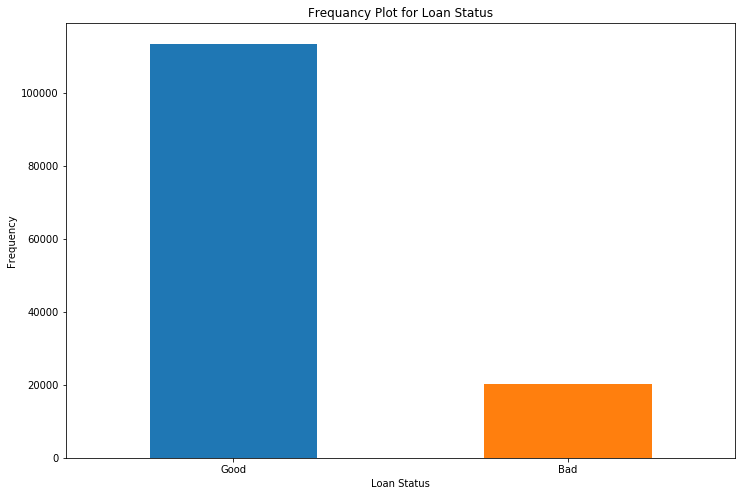

In [199]:
df_select['new_loan_status'].value_counts().plot(kind='bar', rot=0, figsize = (12,8))
plt.title('Frequancy Plot for Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Frequency')

Text(0.5,1,'Loan Status vs Loan Amount')

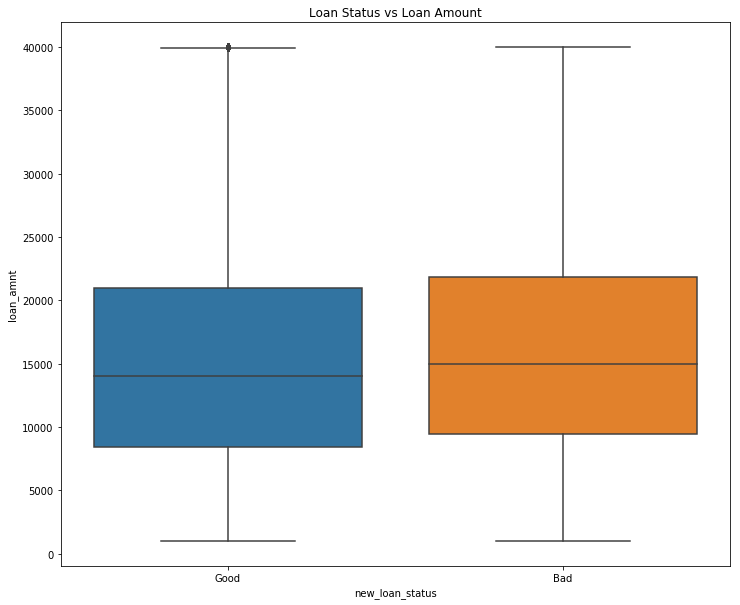

In [200]:
import seaborn as sns
plt.figure(figsize=(12,10))
sns.boxplot(x="new_loan_status", y = "loan_amnt", data = df_select)
plt.title('Loan Status vs Loan Amount')

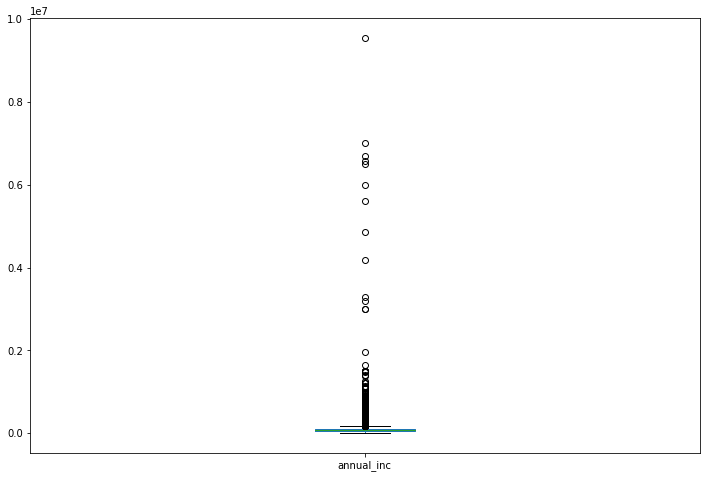

In [142]:
df_select.annual_inc.plot(kind = "box", figsize = (12,8))

In [143]:
df_select['new_annual_inc'] = df_select['annual_inc']

In [144]:
a = np.percentile(df_select.new_annual_inc, 90)

In [145]:
df_select.new_annual_inc = np.where(df_select.new_annual_inc > a, a, df_select.new_annual_inc)

Text(0.5,1,'Boxplot of Annual Income')

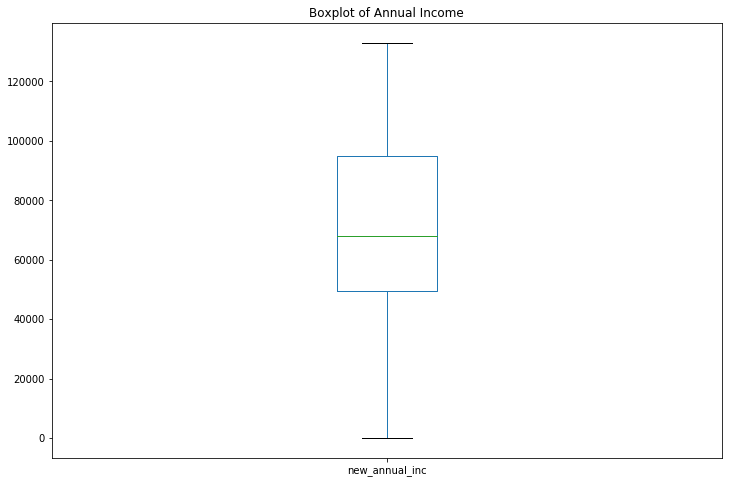

In [202]:
df_select.new_annual_inc.plot(kind = "box", figsize = (12,8))
plt.title('Boxplot of Annual Income')

Text(0.5,1,'Annual Income vs Grade')

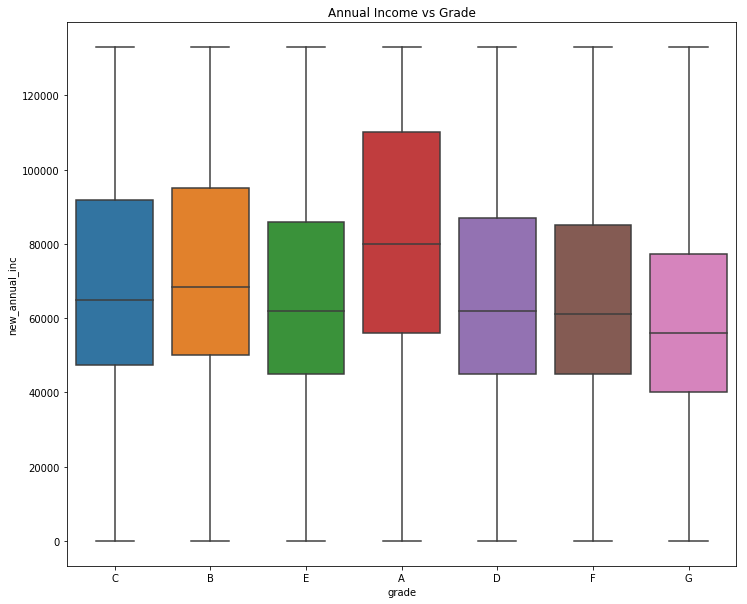

In [201]:
plt.figure(figsize=(12,10))
sns.boxplot(x="grade", y = "new_annual_inc", data = df_select)
plt.title('Annual Income vs Grade')

Text(0.5,1,'Annual Income vs Interest Rate')

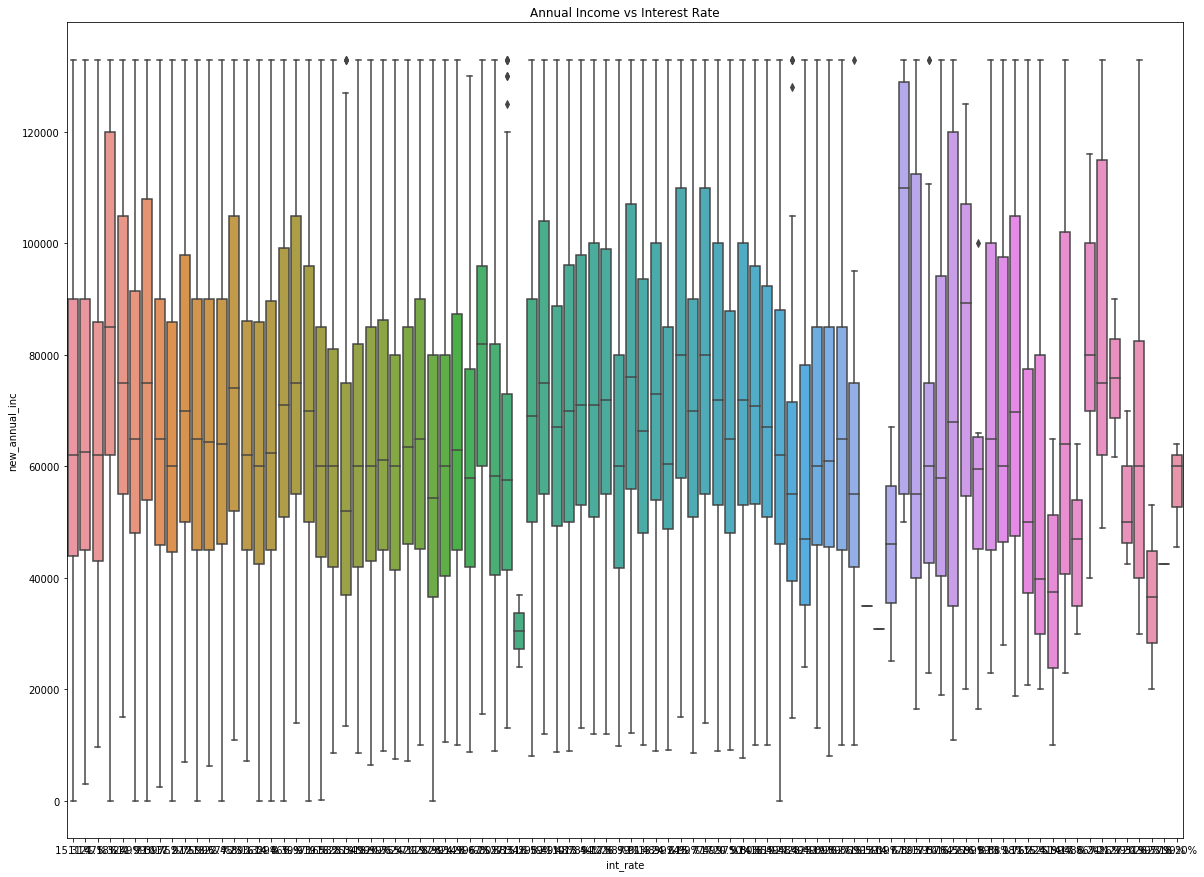

In [205]:
plt.figure(figsize=(20,15))
sns.boxplot(x="int_rate", y = "new_annual_inc", data = df_select)
plt.title('Annual Income vs Interest Rate')

In [147]:
df_select['new_annual_inc'].describe()

count   133887.000
mean     73676.920
std      32196.940
min          0.000
25%      49500.000
50%      68000.000
75%      95008.000
max     133000.000
Name: new_annual_inc, dtype: float64

In [148]:
df_select.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'purpose', 'zip_code', 'addr_state', 'new_loan_status',
       'new_annual_inc'],
      dtype='object')

In [208]:
df_select.shape

(133887, 18)

# Building Models

In [149]:
df_final = df_select.drop(['funded_amnt', 'funded_amnt_inv', 'loan_status', 'issue_d', 'zip_code', 'addr_state', 'annual_inc'], axis =1)

In [150]:
df_final.int_rate = df_final.int_rate.str.replace("%", "").astype("float")

In [207]:
df_final.head()

,loan_amnt,term,int_rate,installment,grade,home_ownership,verification_status,pymnt_plan,purpose,new_loan_status,new_annual_inc
0,34000.000,60 months,15.310,814.410,C,MORTGAGE,Source Verified,n,debt_consolidation,Good,133000.000
1,12200.000,60 months,11.470,268.130,B,RENT,Verified,n,debt_consolidation,Good,90000.000
2,10000.000,36 months,11.470,329.620,B,RENT,Source Verified,n,other,Good,35000.000
3,21000.000,36 months,11.470,692.200,B,MORTGAGE,Not Verified,n,home_improvement,Good,133000.000
4,35000.000,60 months,21.180,950.420,E,MORTGAGE,Verified,n,debt_consolidation,Good,133000.000


In [152]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from imblearn.under_sampling import NearMiss
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

In [153]:
X = df_final.iloc[:, [0,1,2,3,4,5,6,7,8,10]].values
y = df_final.loc[:, "new_loan_status"].values

In [154]:
label_encoder_term = LabelEncoder()
label_encoder_grade = LabelEncoder()
label_encoder_ho = LabelEncoder()
label_encoder_vs = LabelEncoder()
label_encoder_pp = LabelEncoder()
label_encoder_purpose = LabelEncoder()
label_encoder_ls = LabelEncoder()

label_encoder_term.fit(X[:,1]) #never enter multiple column here, it doesn't work
X[:,1] = label_encoder_term.transform(X[:,1])

label_encoder_grade.fit(X[:,4]) #never enter multiple column here, it doesn't work
X[:,4] = label_encoder_grade.transform(X[:,4])

label_encoder_ho.fit(X[:,5]) #never enter multiple column here, it doesn't work
X[:,5] = label_encoder_ho.transform(X[:,5])

label_encoder_vs.fit(X[:,6]) #never enter multiple column here, it doesn't work
X[:,6] = label_encoder_vs.transform(X[:,6])

label_encoder_pp.fit(X[:,7]) #never enter multiple column here, it doesn't work
X[:,7] = label_encoder_pp.transform(X[:,7])

label_encoder_purpose.fit(X[:,8]) #never enter multiple column here, it doesn't work
X[:,8] = label_encoder_purpose.transform(X[:,8])


In [155]:
one_hot_encoder = OneHotEncoder(categorical_features=[1,4,5,6,7,8], sparse=False)
one_hot_encoder.fit(X)
X= one_hot_encoder.transform(X)

X = np.delete(X, one_hot_encoder.feature_indices_[ : -1], 1)

In [156]:
label_encoder_purpose.fit(y) #never enter multiple column here, it doesn't work
y = label_encoder_purpose.transform(y)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 0 ) 

In [31]:
glm_model = LogisticRegression()
glm_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [32]:
y_pred = glm_model.predict(X_test)
y_pred_prob = glm_model.predict_proba(X_test) [:, 1]

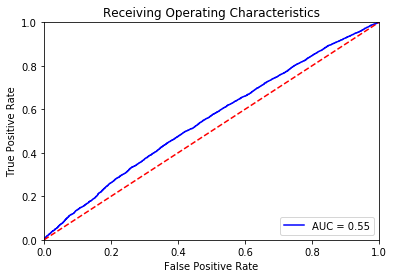

In [33]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
auc_score = roc_auc_score(y_test, y_pred_prob)
plt.title('Receiving Operating Characteristics')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f'%auc_score)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [34]:
dtc_model = DecisionTreeClassifier()
dtc_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [35]:
y_pred_dtc = dtc_model.predict(X_test)
y_pred_prob_dtc = dtc_model.predict_proba(X_test) [:, 1]

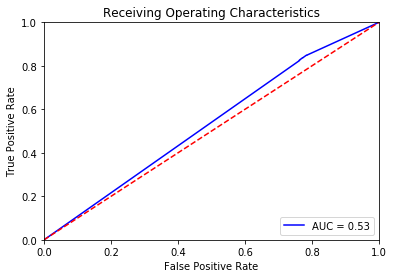

In [36]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob_dtc)
auc_score = roc_auc_score(y_test, y_pred_prob_dtc)
plt.title('Receiving Operating Characteristics')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f'%auc_score)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [38]:
rf_model = RandomForestClassifier(n_estimators=1000)
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [39]:
y_pred_rf = rf_model.predict(X_test)
y_pred_prob_rf = rf_model.predict_proba(X_test) [:, 1]

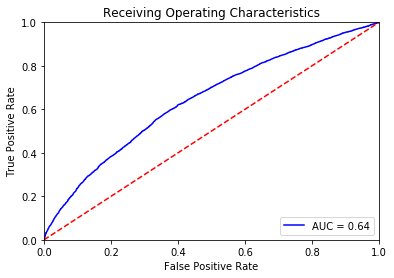

In [40]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob_rf)
auc_score = roc_auc_score(y_test, y_pred_prob_rf)
plt.title('Receiving Operating Characteristics')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f'%auc_score)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [41]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost_model = AdaBoostClassifier()
ada_boost_model.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [42]:
y_pred_ada = ada_boost_model.predict(X_test)
y_pred_prob_ada = ada_boost_model.predict_proba(X_test) [:, 1]

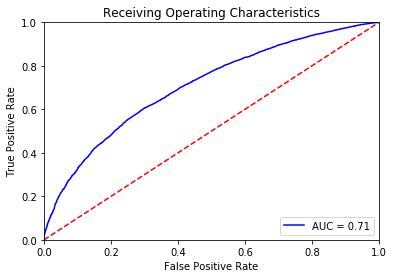

In [43]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob_ada)
auc_score = roc_auc_score(y_test, y_pred_prob_ada)
plt.title('Receiving Operating Characteristics')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f'%auc_score)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [44]:
from sklearn.ensemble import GradientBoostingClassifier

gda_boost_model = GradientBoostingClassifier(learning_rate=0.001)
gda_boost_model.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.001, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [45]:
y_pred_gda = gda_boost_model.predict(X_test)
y_pred_prob_gda = gda_boost_model.predict_proba(X_test) [:, 1]

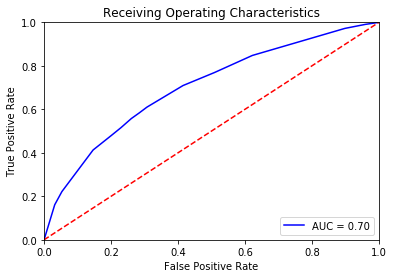

In [46]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob_gda)
auc_score = roc_auc_score(y_test, y_pred_prob_gda)
plt.title('Receiving Operating Characteristics')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f'%auc_score)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [157]:
under_sampling = NearMiss()
X_new, y_new = under_sampling.fit_sample(X, y)

In [48]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size =0.2, random_state = 0 ) 

In [49]:
ada_boost_model_new = AdaBoostClassifier()
ada_boost_model_new.fit(X_train_new, y_train_new)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [50]:
y_pred_ada_new = ada_boost_model_new.predict(X_test_new)
y_pred_prob_ada_new = ada_boost_model_new.predict_proba(X_test_new) [:, 1]

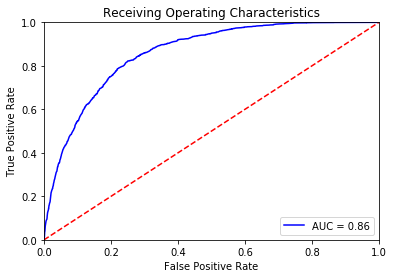

In [51]:
fpr, tpr, threshold = roc_curve(y_test_new, y_pred_prob_ada_new)
auc_score = roc_auc_score(y_test_new, y_pred_prob_ada_new)
plt.title('Receiving Operating Characteristics')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f'%auc_score)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [52]:
bagging_model = BaggingClassifier()
bagging_model.fit(X_train_new, y_train_new)

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [53]:
y_pred_bagging = bagging_model.predict(X_test_new)
y_pred_prob_bagging = bagging_model.predict_proba(X_test_new) [:, 1]

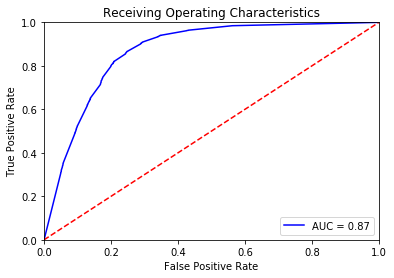

In [54]:
fpr, tpr, threshold = roc_curve(y_test_new, y_pred_prob_bagging)
auc_score = roc_auc_score(y_test_new, y_pred_prob_bagging)
plt.title('Receiving Operating Characteristics')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f'%auc_score)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [55]:
from sklearn.naive_bayes import GaussianNB
gnb_model = GaussianNB()
gnb_model.fit(X_train_new, y_train_new)

GaussianNB(priors=None)

In [56]:
y_pred_gnb = gnb_model.predict(X_test_new)
y_pred_prob_gnb = gnb_model.predict_proba(X_test_new) [:, 1]

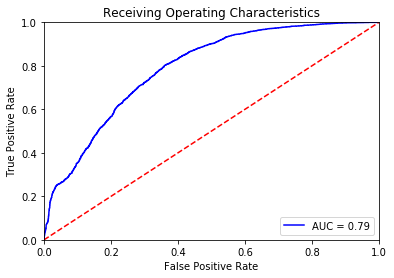

In [57]:
fpr, tpr, threshold = roc_curve(y_test_new, y_pred_prob_gnb)
auc_score = roc_auc_score(y_test_new, y_pred_prob_gnb)
plt.title('Receiving Operating Characteristics')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f'%auc_score)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# We observed that Adaptive Boosting gave us the best results. Hence, we will predict the 2016 Q2 data and train our model using Adaptive Boosting on Quarter 1 data. 

In [158]:
df_test = pd.read_csv('LoanStats_2016Q2.csv', engine = 'python', skipinitialspace=True, skiprows = 1)

In [159]:
df_test.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,nan,12000.000,12000.000,12000.000,36 months,15.59%,419.460,C,C5,...,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan
1,NaN,nan,2000.000,2000.000,2000.000,36 months,16.99%,71.300,D,D1,...,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan
2,NaN,nan,10000.000,10000.000,10000.000,36 months,17.99%,361.480,D,D2,...,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan
3,NaN,nan,32000.000,32000.000,32000.000,36 months,13.99%,1093.530,C,C3,...,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan
4,NaN,nan,30000.000,30000.000,30000.000,60 months,24.49%,871.600,E,E3,...,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan


In [160]:
df_test_select = df_test[['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'home_ownership'
              , 'annual_inc', 'verification_status', 'loan_status', 'pymnt_plan', 'purpose']]

In [161]:
df_test_select['new_loan_status'] = np.where(df_test_select['loan_status'] == 'Current', 'Good', 
         (np.where(df_test_select['loan_status'] == 'Fully Paid', 'Good','Bad')))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [162]:
df_test_select.head()

,loan_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,new_loan_status
0,12000.000,36 months,15.59%,419.460,C,MORTGAGE,70000.000,Verified,Current,n,debt_consolidation,Good
1,2000.000,36 months,16.99%,71.300,D,OWN,153000.000,Verified,Current,n,other,Good
2,10000.000,36 months,17.99%,361.480,D,RENT,41556.000,Verified,Fully Paid,n,debt_consolidation,Good
3,32000.000,36 months,13.99%,1093.530,C,MORTGAGE,110000.000,Verified,Current,n,debt_consolidation,Good
4,30000.000,60 months,24.49%,871.600,E,RENT,323000.000,Verified,Fully Paid,n,major_purchase,Good


In [163]:
df_test_final = df_test_select.drop(['loan_status'], axis =1)

In [164]:
df_test_final.int_rate = df_test_final.int_rate.str.replace("%", "").astype("float")

In [165]:
df_test_final.head()

,loan_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,new_loan_status
0,12000.000,36 months,15.590,419.460,C,MORTGAGE,70000.000,Verified,n,debt_consolidation,Good
1,2000.000,36 months,16.990,71.300,D,OWN,153000.000,Verified,n,other,Good
2,10000.000,36 months,17.990,361.480,D,RENT,41556.000,Verified,n,debt_consolidation,Good
3,32000.000,36 months,13.990,1093.530,C,MORTGAGE,110000.000,Verified,n,debt_consolidation,Good
4,30000.000,60 months,24.490,871.600,E,RENT,323000.000,Verified,n,major_purchase,Good


In [166]:
df_test_final.isnull().sum()

loan_amnt              2
term                   2
int_rate               2
installment            2
grade                  2
home_ownership         2
annual_inc             2
verification_status    2
pymnt_plan             2
purpose                2
new_loan_status        0
dtype: int64

In [167]:
df_test_final = df_test_final.dropna()

In [168]:
X_test = df_test_final.iloc[:, [0,1,2,3,4,5,6,7,8,9]].values
y_test = df_test_final.loc[:, "new_loan_status"].values

In [169]:
label_encoder_term_test = LabelEncoder()
label_encoder_grade_test = LabelEncoder()
label_encoder_ho_test = LabelEncoder()
label_encoder_vs_test = LabelEncoder()
label_encoder_pp_test = LabelEncoder()
label_encoder_purpose_test = LabelEncoder()
label_encoder_ls_test = LabelEncoder()

label_encoder_term_test.fit(X_test[:,1]) #never enter multiple column here, it doesn't work
X_test[:,1] = label_encoder_term_test.transform(X_test[:,1])

label_encoder_grade_test.fit(X_test[:,4]) #never enter multiple column here, it doesn't work
X_test[:,4] = label_encoder_grade_test.transform(X_test[:,4])

label_encoder_ho_test.fit(X_test[:,5]) #never enter multiple column here, it doesn't work
X_test[:,5] = label_encoder_ho_test.transform(X_test[:,5])

label_encoder_vs_test.fit(X_test[:,7]) #never enter multiple column here, it doesn't work
X_test[:,7] = label_encoder_vs_test.transform(X_test[:,7])

label_encoder_pp_test.fit(X_test[:,8]) #never enter multiple column here, it doesn't work
X_test[:,8] = label_encoder_pp_test.transform(X_test[:,8])

label_encoder_purpose_test.fit(X_test[:,9]) #never enter multiple column here, it doesn't work
X_test[:,9] = label_encoder_purpose_test.transform(X_test[:,9])

one_hot_encoder_test = OneHotEncoder(categorical_features=[1,4,5,7,8,9], sparse=False)
one_hot_encoder_test.fit(X_test)
X_test= one_hot_encoder_test.transform(X_test)

X_test = np.delete(X_test, one_hot_encoder.feature_indices_[ : -1], 1)

label_encoder_ls_test.fit(y_test) #never enter multiple column here, it doesn't work
y_test = label_encoder_ls_test.transform(y_test)

# Logistic Regression

In [170]:
glm_model_final = LogisticRegression()
glm_model_final.fit(X_new, y_new)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [171]:
y_pred_glm_final = glm_model_final.predict(X_test)
y_pred_prob_glm_final = glm_model_final.predict_proba(X_test) [:, 1]

In [172]:
accuracy_score(y_test, y_pred_glm_final)

0.5015533345596501

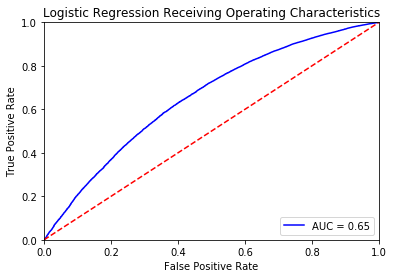

In [173]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob_glm_final)
auc_score = roc_auc_score(y_test, y_pred_prob_glm_final)
plt.title('Logistic Regression Receiving Operating Characteristics')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f'%auc_score)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [198]:
confusion_matrix(y_test, y_pred_glm_final)

array([[10216,  3647],
       [45128, 38863]])

# Adaptive Boosting

In [174]:
ada_boost_model_final = AdaBoostClassifier(n_estimators = 100, learning_rate = 0.001, random_state = 1)
ada_boost_model_final.fit(X_new, y_new)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.001, n_estimators=100, random_state=1)

In [175]:
y_pred_ada_final = ada_boost_model_final.predict(X_test)
y_pred_prob_ada_final = ada_boost_model_final.predict_proba(X_test) [:, 1]

In [176]:
accuracy_score(y_test, y_pred_ada_final)

0.7285139084758927

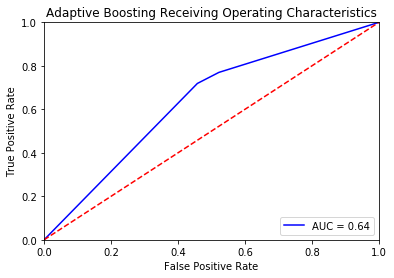

In [177]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob_ada_final)
auc_score = roc_auc_score(y_test, y_pred_prob_ada_final)
plt.title('Adaptive Boosting Receiving Operating Characteristics')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f'%auc_score)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Gradient Boosting

In [178]:
gda_boost_model_final = GradientBoostingClassifier(learning_rate=0.001)
gda_boost_model_final.fit(X_new, y_new)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.001, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [179]:
y_pred_gda_final = gda_boost_model_final.predict(X_test)
y_pred_prob_gda_final = gda_boost_model_final.predict_proba(X_test) [:, 1]

In [180]:
accuracy_score(y_test, y_pred_gda_final)

0.6440002452633515

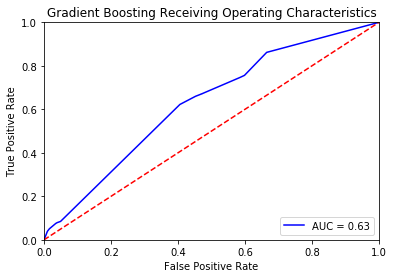

In [181]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob_gda_final)
auc_score = roc_auc_score(y_test, y_pred_prob_gda_final)
plt.title('Gradient Boosting Receiving Operating Characteristics')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f'%auc_score)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Bagging

In [182]:
bagging_model_final = BaggingClassifier(n_estimators = 10, max_samples = 0.001)
bagging_model_final.fit(X_new, y_new)

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=0.001,
         n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [183]:
y_pred_bagging_final = bagging_model_final.predict(X_test)
y_pred_prob_bagging_final = bagging_model_final.predict_proba(X_test) [:, 1]

In [185]:
accuracy_score(y_test, y_pred_bagging_final)

0.4874404725407239

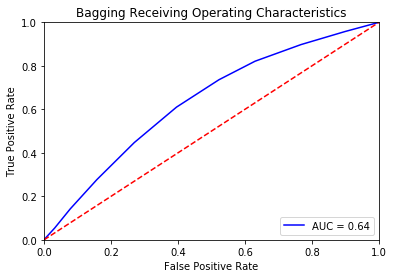

In [184]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob_bagging_final)
auc_score = roc_auc_score(y_test, y_pred_prob_bagging_final)
plt.title('Bagging Receiving Operating Characteristics')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f'%auc_score)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Decision Tree

In [186]:
dtc_model_final = DecisionTreeClassifier()
dtc_model_final.fit(X_new, y_new)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [187]:
y_pred_dtc_final = dtc_model_final.predict(X_test)
y_pred_prob_dtc_final = dtc_model_final.predict_proba(X_test) [:, 1]

In [188]:
accuracy_score(y_test, y_pred_dtc_final)

0.33338442986490074

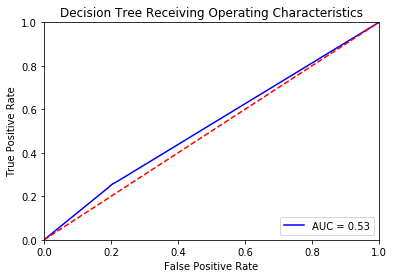

In [189]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob_dtc_final)
auc_score = roc_auc_score(y_test, y_pred_prob_dtc_final)
plt.title('Decision Tree Receiving Operating Characteristics')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f'%auc_score)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Naive Bayes Classification

In [190]:
gnb_model_final = GaussianNB()
gnb_model_final.fit(X_new, y_new)

GaussianNB(priors=None)

In [191]:
y_pred_gnb_final = gnb_model_final.predict(X_test)
y_pred_prob_gnb_final = gnb_model_final.predict_proba(X_test) [:, 1]

In [197]:
accuracy_score(y_test, y_pred_gnb_final)

0.687534490158808

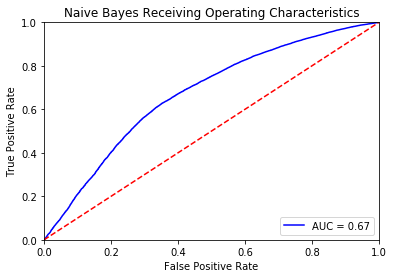

In [192]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob_gnb_final)
auc_score = roc_auc_score(y_test, y_pred_prob_gnb_final)
plt.title('Naive Bayes Receiving Operating Characteristics')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f'%auc_score)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Random Forest

In [193]:
rf_model_final = RandomForestClassifier(n_estimators=1000)
rf_model_final.fit(X_new, y_new)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [194]:
y_pred_rf_final = rf_model_final.predict(X_test)
y_pred_prob_rf_final = rf_model_final.predict_proba(X_test) [:, 1]

In [195]:
accuracy_score(y_test, y_pred_rf_final)

0.3983894373249944

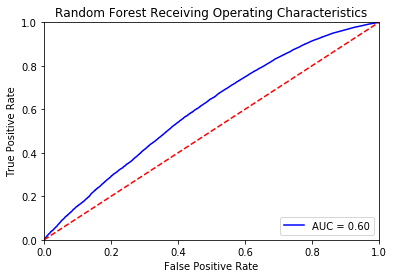

In [196]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob_rf_final)
auc_score = roc_auc_score(y_test, y_pred_prob_rf_final)
plt.title('Random Forest Receiving Operating Characteristics')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f'%auc_score)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Predicting Q3 data

In [113]:
df_Q3 = pd.read_csv('LoanStats_2016Q3.csv', engine = 'python', skipinitialspace=True, skiprows = 1)

In [114]:
df_Q3_test_select = df_Q3[['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'home_ownership'
              , 'annual_inc', 'verification_status', 'loan_status', 'pymnt_plan', 'purpose']]

In [115]:
df_Q3_test_select['new_loan_status'] = np.where(df_Q3_test_select['loan_status'] == 'Current', 'Good', 
         (np.where(df_Q3_test_select['loan_status'] == 'Fully Paid', 'Good','Bad')))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [116]:
df_Q3_test_final = df_Q3_test_select.drop(['loan_status'], axis =1)

In [117]:
df_Q3_test_final.int_rate = df_Q3_test_final.int_rate.str.replace("%", "").astype("float")

In [118]:
df_Q3_test_final.head()

,loan_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,new_loan_status
0,35000.000,60 months,17.990,888.580,D,MORTGAGE,70000.000,Not Verified,n,debt_consolidation,Good
1,12000.000,60 months,9.490,251.970,B,MORTGAGE,70000.000,Source Verified,n,debt_consolidation,Good
2,15000.000,36 months,13.990,512.600,C,RENT,67000.000,Verified,n,credit_card,Good
3,7000.000,36 months,10.990,229.140,B,MORTGAGE,38000.000,Not Verified,n,debt_consolidation,Good
4,7000.000,36 months,12.790,235.160,C,RENT,45386.000,Verified,n,debt_consolidation,Good


In [119]:
df_Q3_test_final.isnull().sum()

loan_amnt              2
term                   2
int_rate               2
installment            2
grade                  2
home_ownership         2
annual_inc             2
verification_status    2
pymnt_plan             2
purpose                2
new_loan_status        0
dtype: int64

In [120]:
df_Q3_test_final = df_Q3_test_final.dropna()

In [122]:
X_test_1 = df_Q3_test_final.iloc[:, [0,1,2,3,4,5,6,7,8,9]].values
y_test_1 = df_Q3_test_final.loc[:, "new_loan_status"].values

In [123]:
label_encoder_term_test = LabelEncoder()
label_encoder_grade_test = LabelEncoder()
label_encoder_ho_test = LabelEncoder()
label_encoder_vs_test = LabelEncoder()
label_encoder_pp_test = LabelEncoder()
label_encoder_purpose_test = LabelEncoder()
label_encoder_ls_test = LabelEncoder()

label_encoder_term_test.fit(X_test_1[:,1]) #never enter multiple column here, it doesn't work
X_test_1[:,1] = label_encoder_term_test.transform(X_test_1[:,1])

label_encoder_grade_test.fit(X_test_1[:,4]) #never enter multiple column here, it doesn't work
X_test_1[:,4] = label_encoder_grade_test.transform(X_test_1[:,4])

label_encoder_ho_test.fit(X_test_1[:,5]) #never enter multiple column here, it doesn't work
X_test_1[:,5] = label_encoder_ho_test.transform(X_test_1[:,5])

label_encoder_vs_test.fit(X_test_1[:,7]) #never enter multiple column here, it doesn't work
X_test_1[:,7] = label_encoder_vs_test.transform(X_test_1[:,7])

label_encoder_pp_test.fit(X_test_1[:,8]) #never enter multiple column here, it doesn't work
X_test_1[:,8] = label_encoder_pp_test.transform(X_test_1[:,8])

label_encoder_purpose_test.fit(X_test_1[:,9]) #never enter multiple column here, it doesn't work
X_test_1[:,9] = label_encoder_purpose_test.transform(X_test_1[:,9])

one_hot_encoder_test = OneHotEncoder(categorical_features=[1,4,5,7,8,9], sparse=False)
one_hot_encoder_test.fit(X_test_1)
X_test_1= one_hot_encoder_test.transform(X_test_1)

X_test_1 = np.delete(X_test_1, one_hot_encoder.feature_indices_[ : -1], 1)

label_encoder_ls_test.fit(y_test_1) #never enter multiple column here, it doesn't work
y_test_1 = label_encoder_ls_test.transform(y_test_1)

In [124]:
y_pred_ada_final_1 = ada_boost_model_final.predict(X_test_1)
y_pred_prob_ada_final_1 = ada_boost_model_final.predict_proba(X_test_1) [:, 1]

ValueError: Number of features of the model must match the input. Model n_features is 27 and input n_features is 29 